# Exploratory Data Analysis of the comments made on NYT articles

The dataset here comprises of comments made on articles in New York Times in Jan-April 2018 and Jan-April 2017. Here we explore the features of the dataset for March 2018 and in particular study their relationship with the feature recommendations that counts the number of upvotes a comment has received.

# Importing modules and loading data

First we import python modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

Next we import the dataframe containing all the comments on New York Times articles published in January 2018.

In [2]:
comments = pd.read_csv('CommentsJan2018.csv')
articles = pd.read_csv('ArticlesJan2018.csv')

We write the two functions that are used often:

In [3]:
def print_largest_values(s, n=5):
    s = sorted(s.unique())
    for v in s[-1:-(n+1):-1]:
        print(v)
    print()
    
def print_smallest_values(s, n=5):
    s = sorted(s.unique())
    for v in s[:n]:
        print(v)
    print()

### A first look at the comments' dataframe and some data preprocessing:

In [4]:
comments.sample(5)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
71071,1516603865,5a61f48610f40f00018bcdcc,1168,"I have 2 incredibly loving daughters, but my y...",25648850.0,25648850.0,<br/>,comment,1516603850,1.0,...,approved,1,0,News,1516603865,B. Ligon,77878029.0,"Greeley, Colorado",NaN,NaN
186741,1515087486,5a4e76487c459f29e79b21a8,902,Staying in office - that’s all that really mat...,25426217.0,25426217.0,<br/>,comment,1515085916,1.0,...,approved,1,0,Op-Ed,1515087486,Robbiesimon,67151326.0,Washington,NaN,NaN
57293,1517190002,5a6707b810f40f00018bd48b,1532,Gentrification is a heavy word. I’m a 3rd gen...,25733210.0,25733210.0,<br/>,comment,1517172663,1.0,...,approved,1,0,News,1517190002,CeeCee,69822000.0,Brooklyn,NaN,NaN
49912,1516788636,5a67d83d10f40f00018bd67d,805,Manish:<br/><br/>I suspect you of an irrationa...,25677796.0,25677796.0,<br/>,userReply,1516788631,2.0,...,approved,1,1,Op-Ed,1516788636,Richard Luettgen,47123844.0,New Jersey,NaN,NaN
136038,1515608512,5a561c0b7c459f29e79b334a,242,President Trump shot himself in his own foot w...,25505764.0,25505764.0,<br/>,comment,1515606251,1.0,...,approved,1,0,News,1515608512,Woodaddy6,60746709.0,New York,NaN,NaN


In [5]:
comments.shape

(203199, 34)

There are 203199 comments in total with 33 features.

Information about the columns' names, datatypes and null values:

In [6]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203199 entries, 0 to 203198
Data columns (total 34 columns):
approveDate              203199 non-null int64
articleID                203199 non-null object
articleWordCount         203199 non-null int64
commentBody              203199 non-null object
commentID                203199 non-null float64
commentSequence          203199 non-null float64
commentTitle             202804 non-null object
commentType              203199 non-null object
createDate               203199 non-null int64
depth                    203199 non-null float64
editorsSelection         203199 non-null bool
inReplyTo                203199 non-null int64
newDesk                  203199 non-null object
parentID                 203199 non-null float64
parentUserDisplayName    57135 non-null object
permID                   203199 non-null object
picURL                   203199 non-null object
printPage                203199 non-null int64
recommendations          2031

The text of the first comment in the dataframe:

In [7]:
comments.commentBody.loc[0]

'I typically strongly dislike articles which bring up such tiny disadvantages to women. But this article I liked. It mentioned, “with many female politicians being replaced by male lawmakers who have pushed for legislation to limit women’s access to abortion,” which would normally tick my non-feminist self off in a regular old article, but I feel as though the beating of their drums are beating a new perspective in my heart. The Bahia group is going against cultural norms by becoming the “first all-female bloco-afro in Brazil” and that problem was certainly not tiny. They are drumming for their rights as women. They are drumming for their rights of their race. This article has influenced me to stand for any matter I want to defend with determination just as these women did in Banda Dida.'

The feature commentTitle is not useful as it only contains <br/> and/or n/a values.

In [8]:
comments.commentTitle.value_counts()

<br/>    202804
Name: commentTitle, dtype: int64

We drop commentTitle along with the columns that contain only null values, as seen by the info() function above.

In [9]:
comments.drop(['commentTitle', 'recommendedFlag', 'reportAbuseFlag', 'userURL'], axis=1, inplace=True)

We first get the statistical summary for the categorical or string variables:

In [10]:
comments.describe(include=['O']).transpose()

,count,unique,top,freq
articleID,203199,1030,5a4e76657c459f29e79b21da,2317
commentBody,203199,202735,Well said.,25
commentType,203199,3,comment,146030
newDesk,203199,36,OpEd,75340
parentUserDisplayName,57135,13862,Richard Luettgen,396
permID,203199,203176,25487204,2
picURL,203199,3699,https://graphics8.nytimes.com/images/apps/time...,171612
sectionName,203199,36,Unknown,123657
status,203199,1,approved,203199
typeOfMaterial,203199,11,News,114482


Next numeric variables:

In [11]:
comments.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
approveDate,203199.0,1.516177e+09,8.385736e+05,1.514777e+09,1.515509e+09,1.516195e+09,1.516828e+09,1.524151e+09
articleWordCount,203199.0,1.225604e+03,8.209697e+02,2.800000e+01,8.460000e+02,1.095000e+03,1.434000e+03,9.942000e+03
commentID,203199.0,2.558788e+07,1.237258e+05,2.538917e+07,2.548323e+07,2.558607e+07,2.568576e+07,2.679587e+07
commentSequence,203199.0,2.558788e+07,1.237259e+05,2.538917e+07,2.548323e+07,2.558607e+07,2.568576e+07,2.679587e+07
createDate,203199.0,1.516163e+09,8.332360e+05,1.514768e+09,1.515491e+09,1.516169e+09,1.516821e+09,1.524151e+09
depth,203199.0,1.285951e+00,4.619489e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
inReplyTo,203199.0,7.197648e+06,1.150373e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.542355e+07,2.676218e+07
parentID,203199.0,7.197648e+06,1.150373e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.542355e+07,2.676218e+07
printPage,203199.0,8.763355e+00,9.895716e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01,5.800000e+01
recommendations,203199.0,1.704282e+01,8.278536e+01,0.000000e+00,1.000000e+00,3.000000e+00,9.000000e+00,4.668000e+03


In [12]:
comments.dtypes

approveDate                int64
articleID                 object
articleWordCount           int64
commentBody               object
commentID                float64
commentSequence          float64
commentType               object
createDate                 int64
depth                    float64
editorsSelection            bool
inReplyTo                  int64
newDesk                   object
parentID                 float64
parentUserDisplayName     object
permID                    object
picURL                    object
printPage                  int64
recommendations            int64
replyCount                 int64
sectionName               object
sharing                    int64
status                    object
timespeople                int64
trusted                    int64
typeOfMaterial            object
updateDate                 int64
userDisplayName           object
userID                   float64
userLocation              object
userTitle                 object
dtype: obj

Next we look into the missing values in each column

In [13]:
comments.isnull().sum()

approveDate                   0
articleID                     0
articleWordCount              0
commentBody                   0
commentID                     0
commentSequence               0
commentType                   0
createDate                    0
depth                         0
editorsSelection              0
inReplyTo                     0
newDesk                       0
parentID                      0
parentUserDisplayName    146064
permID                        0
picURL                        0
printPage                     0
recommendations               0
replyCount                    0
sectionName                   0
sharing                       0
status                        0
timespeople                   0
trusted                       0
typeOfMaterial                0
updateDate                    0
userDisplayName              79
userID                        0
userLocation                 28
userTitle                203184
dtype: int64

We fill the missing values:

In [14]:
comments.parentUserDisplayName.fillna('Unknown', inplace=True)
comments.sectionName.fillna('Unknown', inplace=True)
comments.userDisplayName.fillna('Unknown', inplace=True)
comments.userLocation.fillna('Unknown', inplace=True)
comments.userTitle.fillna('Unknown', inplace=True)

We will understand the features in the comments' and articles' dataframe by exploring the values they take and how they relate to other features, and most importantly their relationship to the feature recommendations that counts the number of upvotes a comment has received.

### Understanding the distribution of upvotes on comments and removing outliers

We plot the number of upvotes on a random selection of 500 comments and notice that the count of upvotes vary a lot.

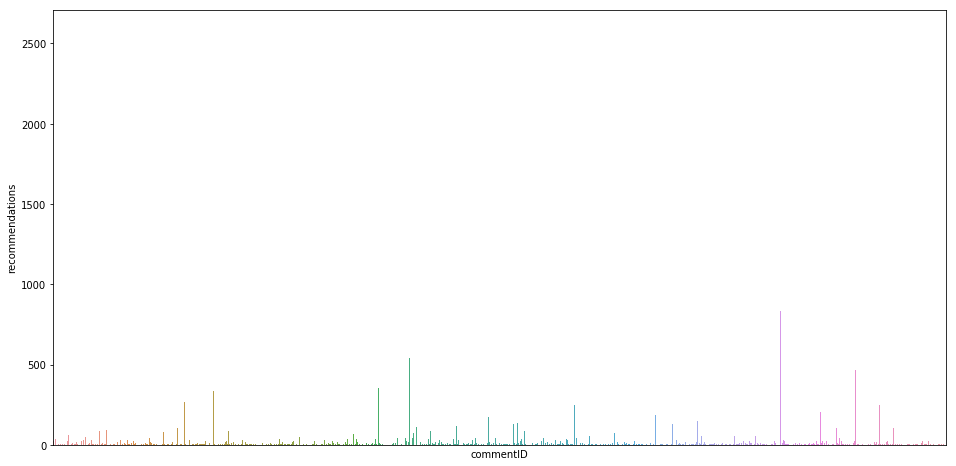

In [15]:
mpl.rcParams['figure.figsize'] = (16, 8)
sns.barplot(x='commentID', y='recommendations', data=comments.sample(2000)); 
plt.xticks([]);

The following graph shows that the distribution of upvotes on the comments is highly skewed to the right. So, the mean of the number upvotes on comments is significantly higher than the median.

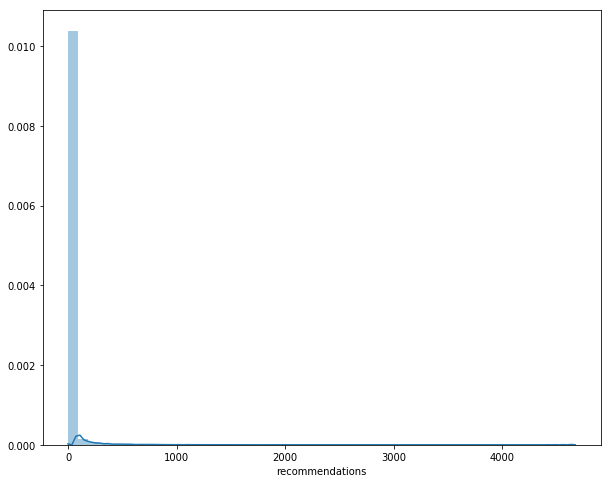

In [16]:
mpl.rcParams['figure.figsize'] = (10, 8)
sns.distplot(comments.recommendations);

The top 5 highest number of upvotes are all above 3000 and they can be considered as outliers.

In [17]:
print_largest_values(comments.recommendations)

4668
4078
3676
3545
3486



99% of comments have fewer than 317 upvotes and 90% of comments have 62 or fewer upvotes.

In [18]:
comments.recommendations.quantile(0.99), comments.recommendations.quantile(0.95)

(287.0, 53.0)

We plot the quantiles for the number of upvotes after discarding the 100th quantile.

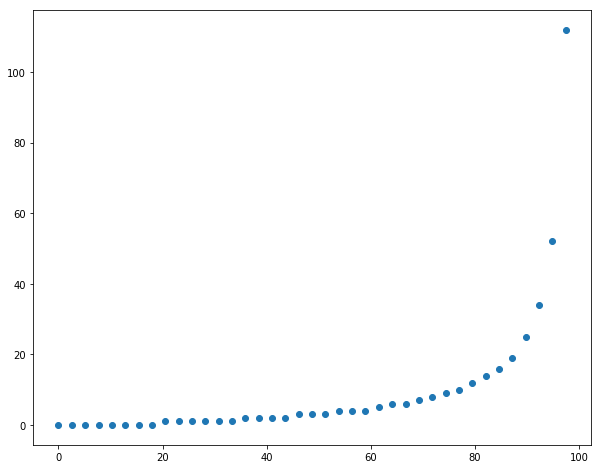

In [19]:
percs = np.linspace(0,100,40)
qn = np.percentile(comments.recommendations, percs)
plt.scatter(percs[:-1], qn[:-1]);

We plot the distribution of upvotes for the comments that are in the bottom 95% in terms of upvotes:

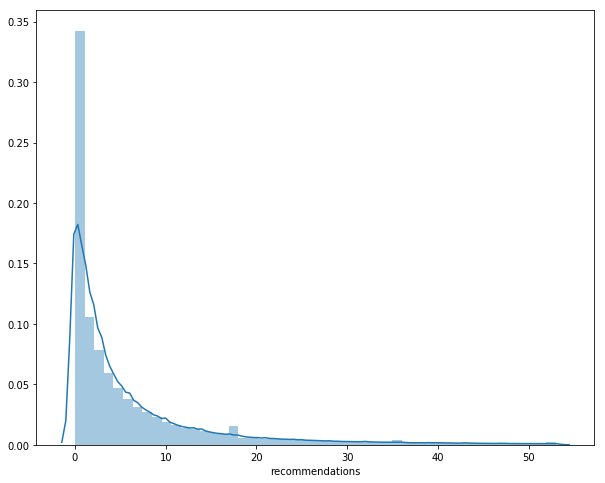

In [20]:
sns.distplot(comments.loc[comments.recommendations<=comments.recommendations.quantile(0.95), 'recommendations']);

Keeping outliers in our dataframe will give misleading averages for the exploratory data analysis. So here we first discard them by restricting the number of upvotes to 2500.

In [21]:
comments[comments.recommendations > 2500].shape

(22, 30)

There are 22 such comments in total that we are discarding.

In [22]:
comments = comments[comments.recommendations < 2500]

### A first look at the articles' dataframe and some feature engineering

In [23]:
articles.head()

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,5a7101c110f40f00018be961,1322,By SHANNON SIMS,article,"Rhythm of the Streets: ‘We’re Warrior Women, a...","['Bahia (Brazil)', 'Music', 'Women and Girls',...",68,Travel,5,2018-01-30 23:37:31,Unknown,Meet the all-female Brazilian drum group that ...,The New York Times,News,https://www.nytimes.com/2018/01/30/travel/braz...
1,NaN,5a70fc1210f40f00018be950,1308,By ALAN RAPPEPORT and THOMAS KAPLAN,article,"As Deficit Grows, Congress Keeps Spending","['United States Politics and Government', 'Fed...",68,Washington,17,2018-01-30 23:13:14,Politics,Treasury Secretary Steven Mnuchin urged Congre...,The New York Times,News,https://www.nytimes.com/2018/01/30/us/politics...
2,NaN,5a70f8f810f40f00018be943,228,By JANE LANG,article,Lesson in Select Bus Service,"['Buses', 'Pennsylvania Station (Manhattan, NY...",0,Metro,16,2018-01-30 23:00:01,Unknown,A woman finds out what happens when you don’t ...,The New York Times,News,https://www.nytimes.com/2018/01/30/nyregion/me...
3,NaN,5a70eb8110f40f00018be925,1114,By THE EDITORIAL BOARD,article,Here’s the Real State of the Union,"['State of the Union Message (US)', 'Trump, Do...",61,Editorial,24,2018-01-30 22:02:36,Editorials,The reaction against his authoritarian impulse...,The New York Times,Editorial,https://www.nytimes.com/2018/01/30/opinion/edi...
4,NaN,5a70d1d210f40f00018be8d9,777,By BERT STRATTON,article,Good Riddance to Chief Wahoo,"['Baseball', 'Cleveland Indians', 'Western Res...",68,OpEd,0,2018-01-30 20:13:01,Unknown,"I’ve lived in Cleveland all my life, and I’m g...",The New York Times,Op-Ed,https://www.nytimes.com/2018/01/30/opinion/chi...


Information about the columns' names, datatypes and null values:

In [24]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 16 columns):
abstract            11 non-null object
articleID           905 non-null object
articleWordCount    905 non-null int64
byline              905 non-null object
documentType        905 non-null object
headline            905 non-null object
keywords            905 non-null object
multimedia          905 non-null int64
newDesk             905 non-null object
printPage           905 non-null int64
pubDate             905 non-null object
sectionName         905 non-null object
snippet             905 non-null object
source              905 non-null object
typeOfMaterial      905 non-null object
webURL              905 non-null object
dtypes: int64(3), object(13)
memory usage: 113.2+ KB


Some of the features in the comments' dataframe are shared with the articles' dataframe:

In [25]:
set(articles.columns).intersection(set(comments.columns))

{'articleID',
 'articleWordCount',
 'newDesk',
 'printPage',
 'sectionName',
 'typeOfMaterial'}

We first get the statistical summary for the categorical or string variables:

In [26]:
articles.describe(include=['O']).transpose()

,count,unique,top,freq
abstract,11,11,"Sebastian Hidalgo documents Pilsen, the old Ch...",1
articleID,905,905,5a653be910f40f00018bd210,1
byline,905,540,By DEB AMLEN,31
documentType,905,2,article,894
headline,905,821,Unknown,84
keywords,905,800,[],64
newDesk,905,36,OpEd,163
pubDate,905,854,2018-01-05 10:00:35,5
sectionName,905,35,Unknown,614
snippet,905,898,What do you think this image is saying?,4


Next numerical variables:

In [27]:
articles.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
articleWordCount,905.0,1107.145856,816.647045,28.0,760.0,1038.0,1319.0,9942.0
multimedia,905.0,64.928177,11.324963,0.0,66.0,68.0,68.0,68.0
printPage,905.0,6.246409,8.460087,0.0,0.0,1.0,11.0,58.0


We check for the missing values:

In [28]:
articles.isnull().sum()

abstract            894
articleID             0
articleWordCount      0
byline                0
documentType          0
headline              0
keywords              0
multimedia            0
newDesk               0
printPage             0
pubDate               0
sectionName           0
snippet               0
source                0
typeOfMaterial        0
webURL                0
dtype: int64

We group the comments' dataframe by articleID and then derive features related to the comments such as the count of comments on each article, the median number of upvotes, etc. and later add them to the articles' dataframe:

In [29]:
grouped = comments.groupby('articleID')
grouped_articles = pd.concat([grouped.commentID.count(), grouped.recommendations.median(),
           grouped[['editorsSelection', 'sharing', 'timespeople', 'trusted']].mean()], 
          axis=1).reset_index().rename(columns = {'commentID': 'commentsCount'})
grouped_articles.sample(5)

,articleID,commentsCount,recommendations,editorsSelection,sharing,timespeople,trusted
746,5a673c9410f40f00018bd4d8,17,1.0,0.000000,0.058824,0.000000,0.0
598,5a61c1c810f40f00018bcd36,18,11.0,0.000000,0.277778,0.944444,0.0
994,5a70260710f40f00018be6c3,21,0.0,0.000000,0.000000,0.714286,0.0
821,5a69258a10f40f00018bd8fe,93,5.0,0.021505,0.096774,0.913978,0.0
373,5a5743b77c459f29e79b3641,27,5.0,0.000000,0.074074,0.925926,0.0


We check whether both dataframes have the same number of rows (articles).

In [30]:
articles.shape, grouped_articles.shape

((905, 16), (1030, 7))

We merge the two dataframes to add more comments' related features to the articles dataframe:

In [31]:
articles = articles.merge(grouped_articles)
articles.sample(5)

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,...,snippet,source,typeOfMaterial,webURL,commentsCount,recommendations,editorsSelection,sharing,timespeople,trusted
53,NaN,5a6fa70510f40f00018be5ca,1360,Compiled by KELLY VIRELLA,article,‘It’s Time for Canada to Grow Up’: As Nafta Ta...,"['Canada', 'North American Free Trade Agreement']",60,NewsDesk,0,...,Canadian readers tell us how they view Nafta a...,The New York Times,News,https://www.nytimes.com/2018/01/29/reader-cent...,29,2.0,0.000000,0.034483,0.827586,0.000000
660,NaN,5a5740477c459f29e79b3634,876,By BRET STEPHENS,article,The Wolff Eats Its Own,"['Trump, Donald J', 'Wolff, Michael (1953- )',...",68,OpEd,0,...,“Fire and Fury” does spectacular damage to Tru...,The New York Times,Op-Ed,https://www.nytimes.com/2018/01/11/opinion/tru...,561,2.0,0.023173,0.083779,0.975045,0.040998
850,NaN,5a535d597c459f29e79b2caf,1060,By AUSTIN FRAKT,article,"A Memory Shortcut, With a Little Help From Fri...","['Memory', 'Chalmers, David J']",61,Upshot,0,...,Humans formed social networks long before soci...,The New York Times,News,https://www.nytimes.com/2018/01/08/upshot/a-me...,39,2.0,0.000000,0.102564,0.948718,0.076923
457,NaN,5a651b7510f40f00018bd1f8,108,By TOM BECKETT,article,Only Trying to Help,['New York City'],0,Metro,18,...,A little too quick to spring into action on th...,The New York Times,News,https://www.nytimes.com/2018/01/21/nyregion/me...,17,16.0,0.000000,0.058824,0.000000,0.000000
400,NaN,5a666d9610f40f00018bd3c4,844,By PAUL KRUGMAN,article,The Art of the Broken Deal,"['Trump, Donald J', 'United States Politics an...",68,OpEd,24,...,"Trump’s promises are worthless, and America wi...",The New York Times,Op-Ed,https://www.nytimes.com/2018/01/22/opinion/art...,634,1.0,0.011041,0.059937,0.954259,0.075710


In [32]:
articles.shape, grouped_articles.shape

((905, 22), (1030, 7))

In [33]:
articles.sample(5)

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,...,snippet,source,typeOfMaterial,webURL,commentsCount,recommendations,editorsSelection,sharing,timespeople,trusted
27,NaN,5a70494610f40f00018be717,840,"By ANUPAM B. JENA, AAKASH JAIN and TANNER R. H...",article,Do ‘Fast and Furious’ Movies Cause a Rise in S...,"['The Fast and the Furious (Movie)', 'Speed Li...",67,Upshot,0,...,Evidence suggests you may want to be more caut...,The New York Times,News,https://www.nytimes.com/2018/01/30/upshot/do-f...,46,1.0,0.000000,0.065217,0.978261,0.043478
868,NaN,5a52a6757c459f29e79b2ba2,516,By DEB AMLEN,article,Hypnotist’s Command,['Crossword Puzzles'],68,Games,0,...,Sam Ezersky evokes a childhood memory for me.,The New York Times,News,https://www.nytimes.com/2018/01/07/crosswords/...,90,2.0,0.011111,0.022222,0.977778,0.344444
81,NaN,5a6ed49510f40f00018be39a,1522,By JAMES BARRON,article,"If Subway Is Nearby, Should You Pay More Taxes?","['Subways', 'Property Taxes', 'Transit Systems...",68,Metro,1,...,Gov. Andrew M. Cuomo has made “value capture” ...,The New York Times,News,https://www.nytimes.com/2018/01/29/nyregion/su...,376,2.0,0.029255,0.079787,0.973404,0.018617
377,NaN,5a615bc610f40f00018bcc66,1014,By JESSE GREEN,article,Who You Are Shapes What You See,"['Theater', 'Until the Flood (Play)', 'Orlande...",67,Weekend,1,...,Dael Orlandersmith’s new play explores the liv...,The New York Times,Review,https://www.nytimes.com/2018/01/18/theater/rev...,14,3.5,0.000000,0.000000,0.785714,0.000000
636,"The civil rights leader was stabbed, honored a...",5a57e1657c459f29e79b3860,378,By JOHN LELAND,blogpost,Unknown,"['Civil Rights Movement (1954-68)', 'News and ...",66,Unknown,0,...,"The civil rights leader was stabbed, honored a...",The New York Times,Blog,https://lens.blogs.nytimes.com/2018/01/11/what...,2,1.0,0.000000,0.000000,0.500000,0.000000


In [34]:
articles.shape

(905, 22)

So now, the articles' dataframe have 16 features in total.

In [35]:
articles.columns

Index(['abstract', 'articleID', 'articleWordCount', 'byline', 'documentType',
       'headline', 'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL',
       'commentsCount', 'recommendations', 'editorsSelection', 'sharing',
       'timespeople', 'trusted'],
      dtype='object')

First we look at the distribution of the number of comments on each article:

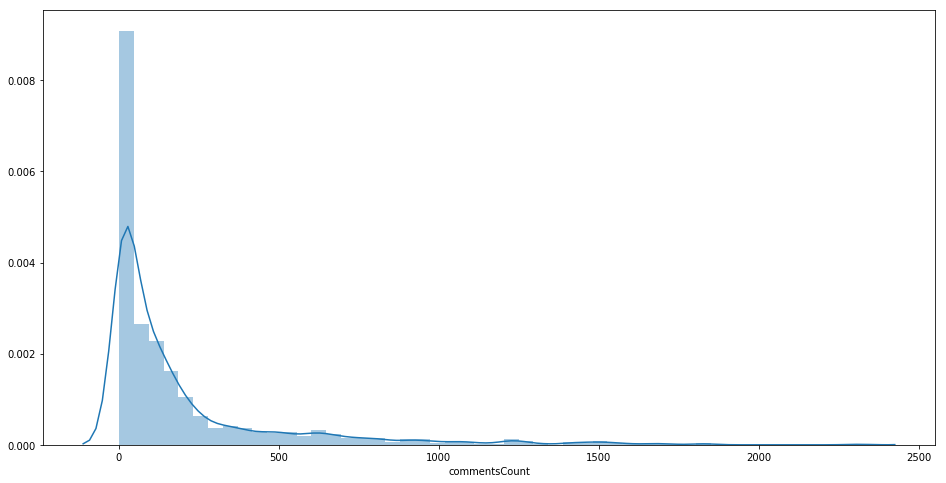

In [36]:
mpl.rcParams['figure.figsize'] = (16, 8)
sns.distplot(grouped_articles.commentsCount);

The distribution is skewed to the right meaning most articles have fewer comments on them, but there are a few exceptions that are highly commented on.

In [37]:
print("Top 5 articles with the highest number of comments have the following count of comments: ")
print_largest_values(grouped_articles.commentsCount)

Top 5 articles with the highest number of comments have the following count of comments: 
2313
1833
1822
1717
1681



The distribution of the word counts of the articles is more close to normal distribution with a some skewness to the right:

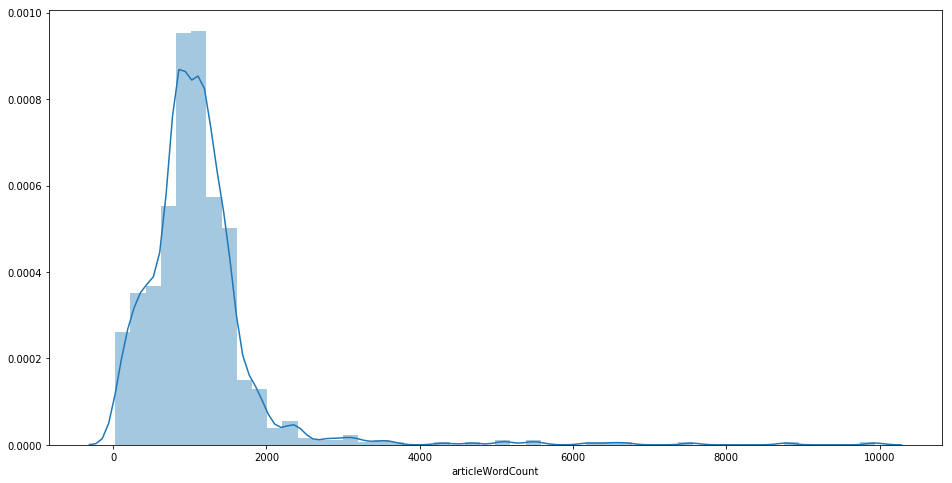

In [38]:
sns.distplot(articles.articleWordCount);

The top 5 lengthiest articles contains the following number of words

In [39]:
print("Top 5 lengthiest articles contains the following number of words: ")
print_largest_values(articles.articleWordCount)
print("Top 5 shortest articles contains the following number of words: ")
print_smallest_values(articles.articleWordCount)

Top 5 lengthiest articles contains the following number of words: 
9942
8780
7543
6681
6472

Top 5 shortest articles contains the following number of words: 
28
55
57
60
62



The distribution of the average number of upvotes on comments on the articles is far less skewed as compared to the distribution of the number of upvotes on comments themselves. The skewness is smoothen out because the mean of the number upvotes on comments is considered.

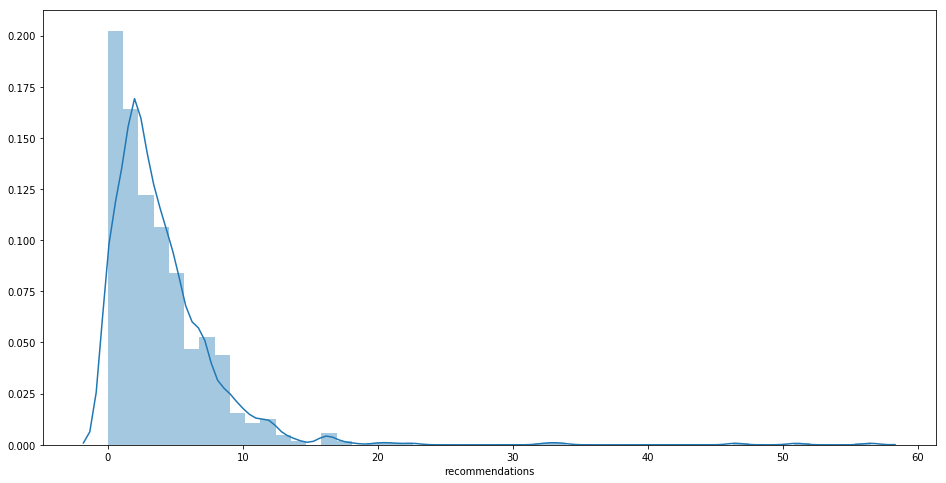

In [40]:
sns.distplot(articles.recommendations);

In [41]:
print("Top 5 articles in terms of the highest number of median upvotes on the comments have the following count of upvotes: ")
print_largest_values(articles.recommendations)
print("Top 5 articles in terms of the least number of median upvotes on the comments have the following count of upvotes: ")
print_smallest_values(articles.recommendations)

Top 5 articles in terms of the highest number of median upvotes on the comments have the following count of upvotes: 
56.5
51.0
46.5
33.5
32.5

Top 5 articles in terms of the least number of median upvotes on the comments have the following count of upvotes: 
0.0
0.5
1.0
1.5
2.0



In [42]:
comments.editorsSelection.value_counts()

False    200206
True       2971
Name: editorsSelection, dtype: int64

# Analyzing different features and their relationship with the number of upvotes in a comment.

### Editor's pick

Every article on NYT that accepts comments displays a selected collection of comments, called NYT's (or Editor's) pick.

In [43]:
comments.editorsSelection.value_counts()

False    200206
True       2971
Name: editorsSelection, dtype: int64

Very few comments are selected as Editor's pick:

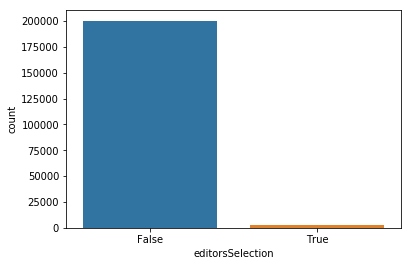

In [44]:
mpl.rcParams['figure.figsize'] = (6, 4)
sns.countplot(x="editorsSelection", data=comments);

The number of upvotes on the comments selected as Editor's pick are significantly higher on average with a mean close to 230 upvotes:

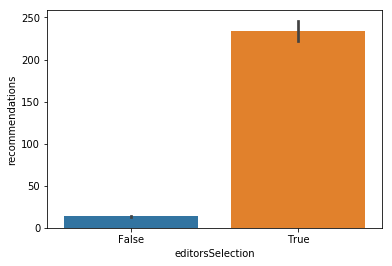

In [45]:
sns.barplot(x='editorsSelection', y='recommendations', data=comments);

Even though the comments that are selected as Editor's picks have more upvotes more on average, the distribution of upvotes is still highly skewed to the right.

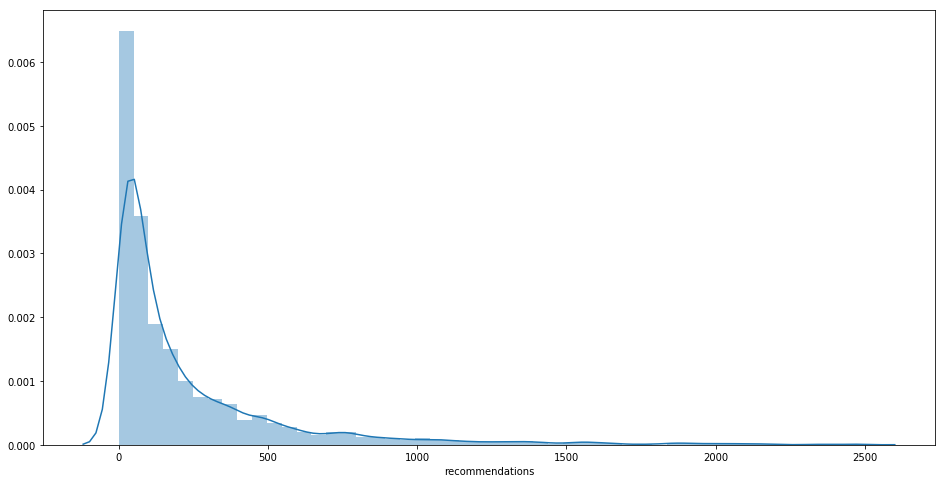

In [46]:
mpl.rcParams['figure.figsize'] = (16, 8)
sns.distplot(comments.loc[comments.editorsSelection==1, 'recommendations']);

This explains the not-so-high correlation coefficient between the two features - Editor's pick and the number of upvotes:

In [47]:
comments.editorsSelection.corr(comments.recommendations)

0.34848664868383655

### Features related to replies to comments

There are three types of comments - usual comments, replies made to other comments/replies and reporter's replies to a comment/reply.

In [48]:
comments.commentType.value_counts()

comment          146008
userReply         57154
reporterReply        15
Name: commentType, dtype: int64

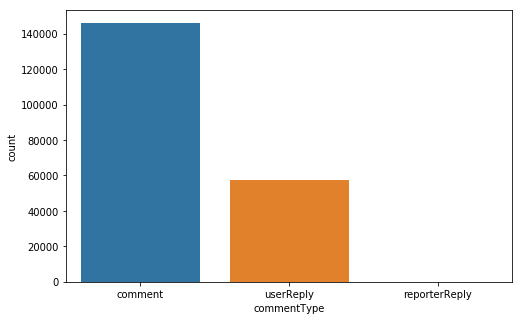

In [49]:
mpl.rcParams['figure.figsize'] = (8, 5)
sns.countplot(x="commentType", data=comments);

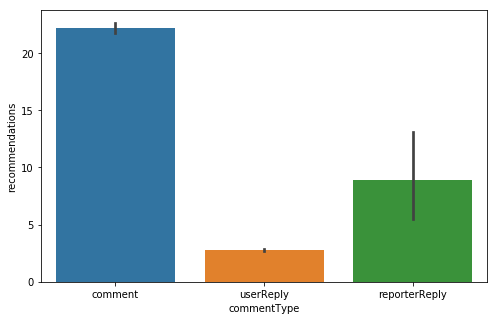

In [50]:
sns.barplot(x='commentType', y='recommendations', data=comments);

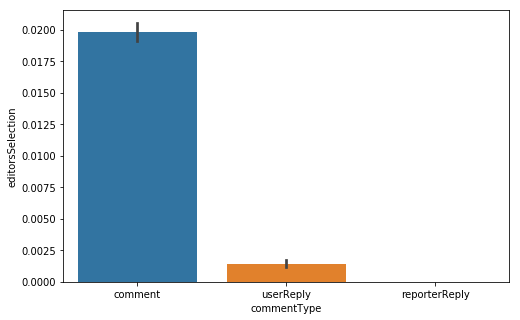

In [51]:
sns.barplot(x='commentType', y='editorsSelection', data=comments);

### Depth

The depth of 2 would mean that the comment was posted as a reply to another comment whereas a depth of 3 would mean that comment was in reply to a comment that was itself a reply. Most of the comments have a depth of 1 as shown below:

In [52]:
comments.depth.value_counts()

1.0    146008
2.0     56233
3.0       936
Name: depth, dtype: int64

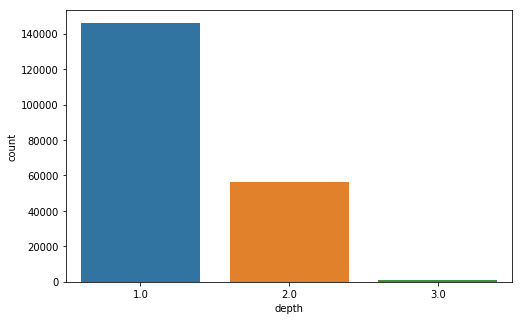

In [53]:
sns.countplot(x="depth", data=comments);

The comments that were replies have significantly less upvotes on average than the original comments. Similarly, the nested comments have the least average number of upvotes.

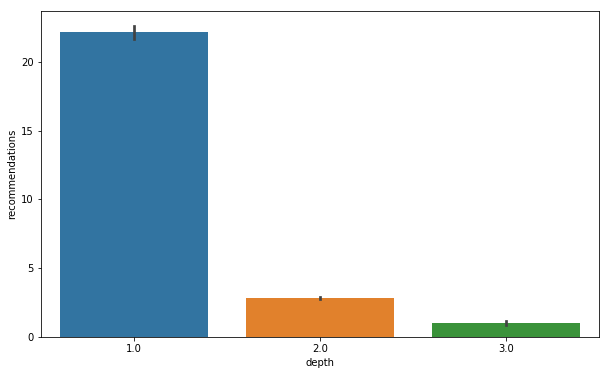

In [54]:
mpl.rcParams['figure.figsize'] = (10, 6)
sns.barplot(x='depth', y='recommendations', data=comments);

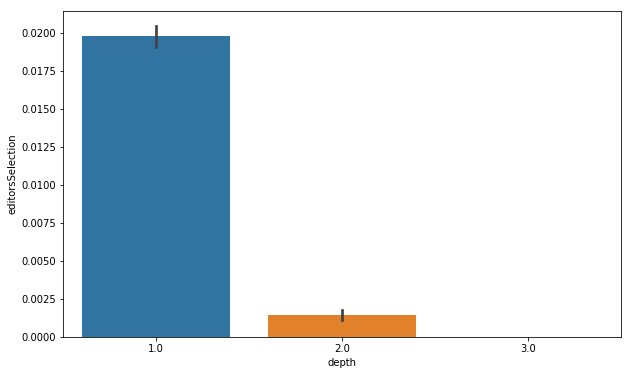

In [55]:
sns.barplot(x='depth', y='editorsSelection', data=comments);

### Interplay between the features - depth and commentType in terms of number of upvotes and editor's pick

From the description above, it is clear that the features - depth and commentType are very closely related to each other. The following two graphs plot the number of upvotes taking both features into account simultaneously:

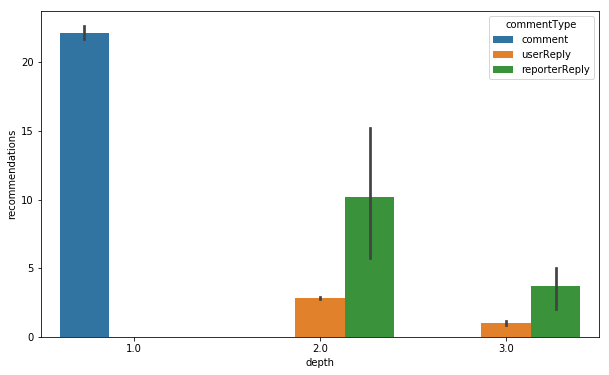

In [56]:
sns.barplot(x='depth', y='recommendations', hue='commentType', data=comments);

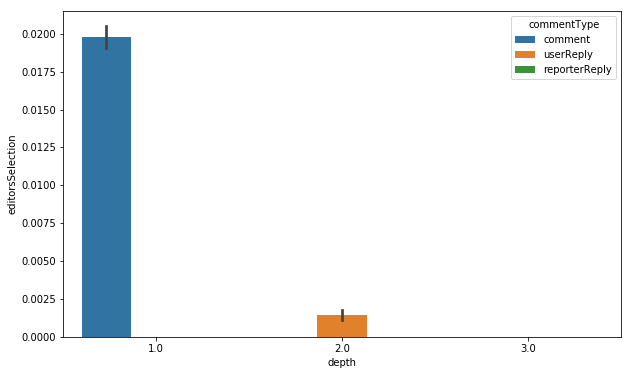

In [57]:
sns.barplot(x='depth', y='editorsSelection', hue='commentType', data=comments);

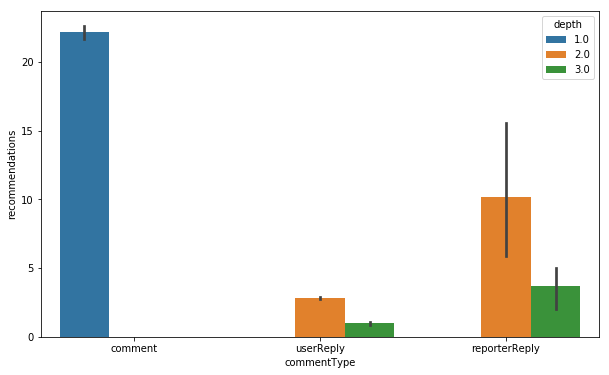

In [58]:
sns.barplot(x='commentType', y='recommendations', hue='depth', data=comments);

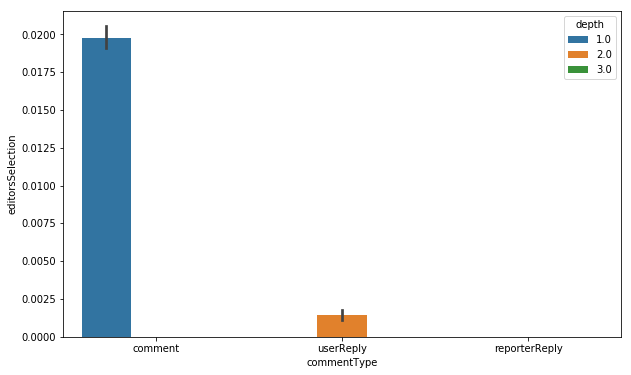

In [59]:
sns.barplot(x='commentType', y='editorsSelection', hue='depth', data=comments);

### Count of replies

For the number of replies to a comment, the average number of upvotes on the comment is plotted below:

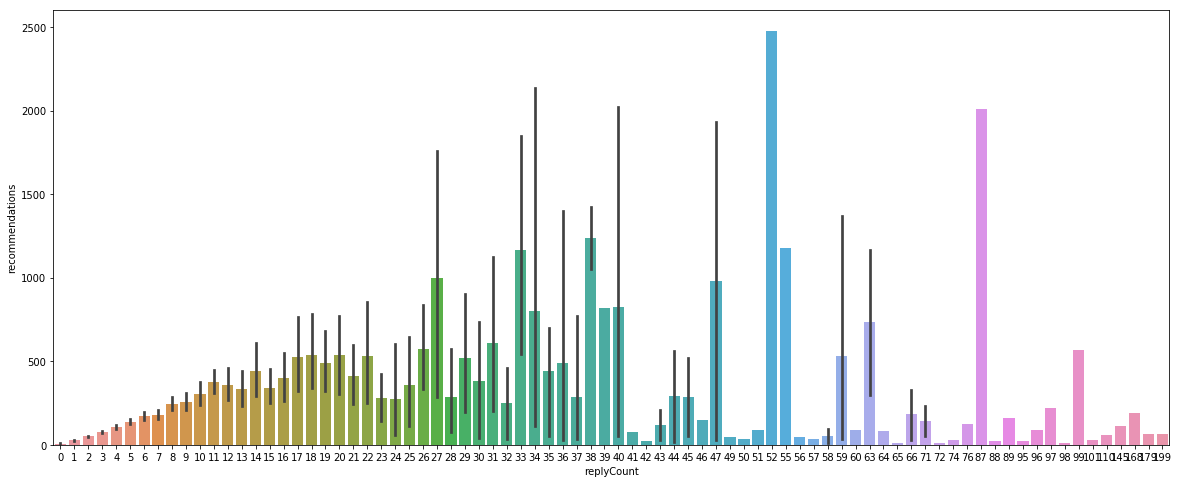

In [60]:
mpl.rcParams['figure.figsize'] = (20, 8)
sns.barplot(x='replyCount', y='recommendations', data=comments);

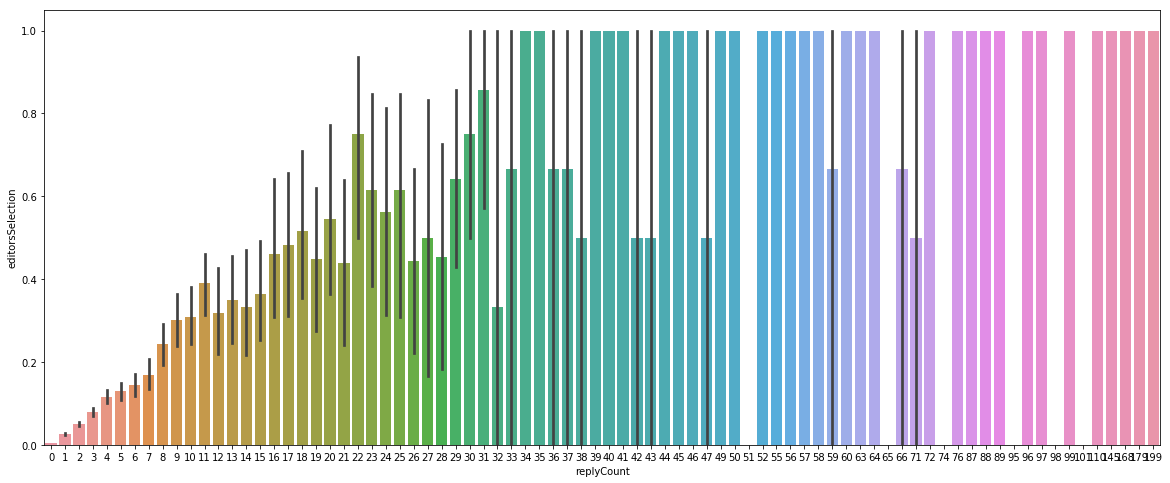

In [61]:
sns.barplot(x='replyCount', y='editorsSelection', data=comments);

## Features related to the articles of the comments

### Page on which the article was printed

The printPage give the number of the page in print newspaper on which the article was published. Here, page 0 means the page for the article is unknown.

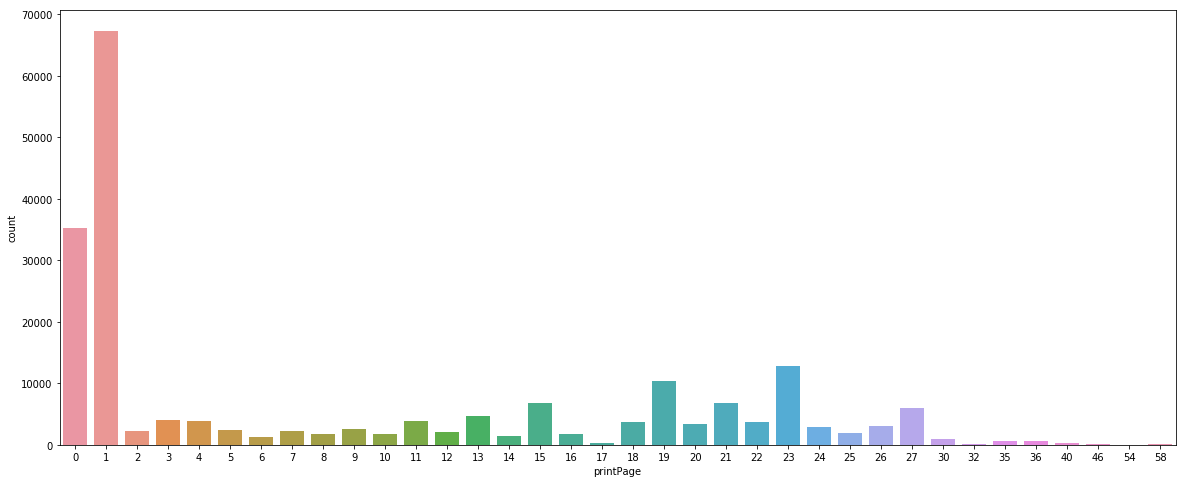

In [62]:
sns.countplot(x="printPage", data=comments);

The number of comments of Page 1 may be higher because more articles from Page 1 were open to comments as shown in the graph below:

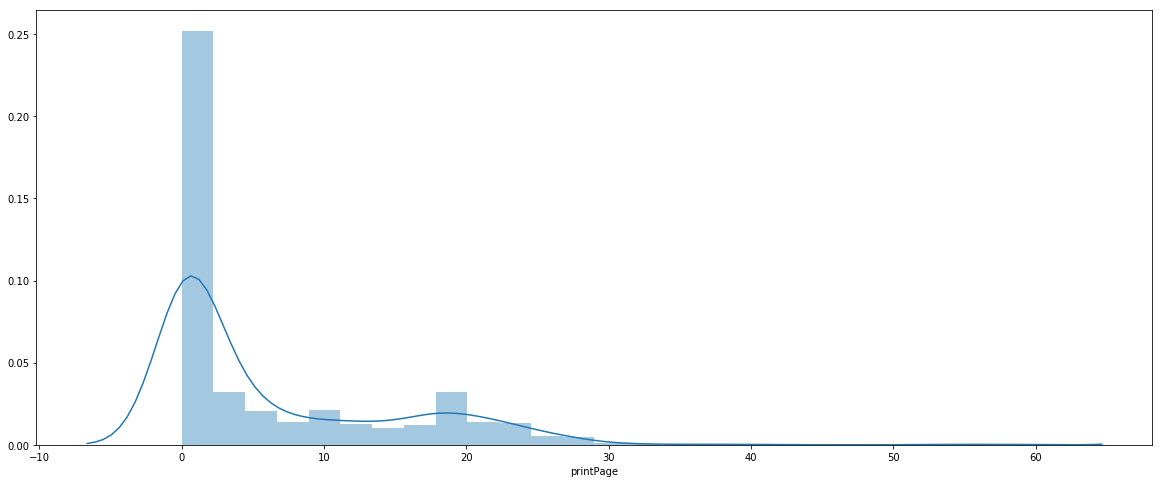

In [63]:
sns.distplot(articles.printPage);

Despite the highly skewed distribution of the number of upvotes on comments from articles on various pages, the average number of upvotes received is more uniform:

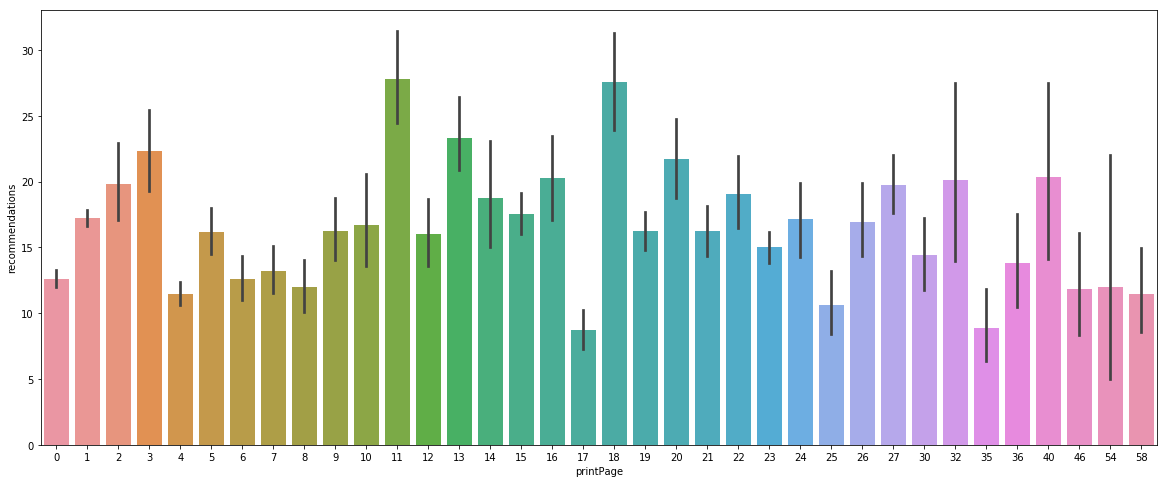

In [64]:
sns.barplot(x='printPage', y='recommendations', data=comments);

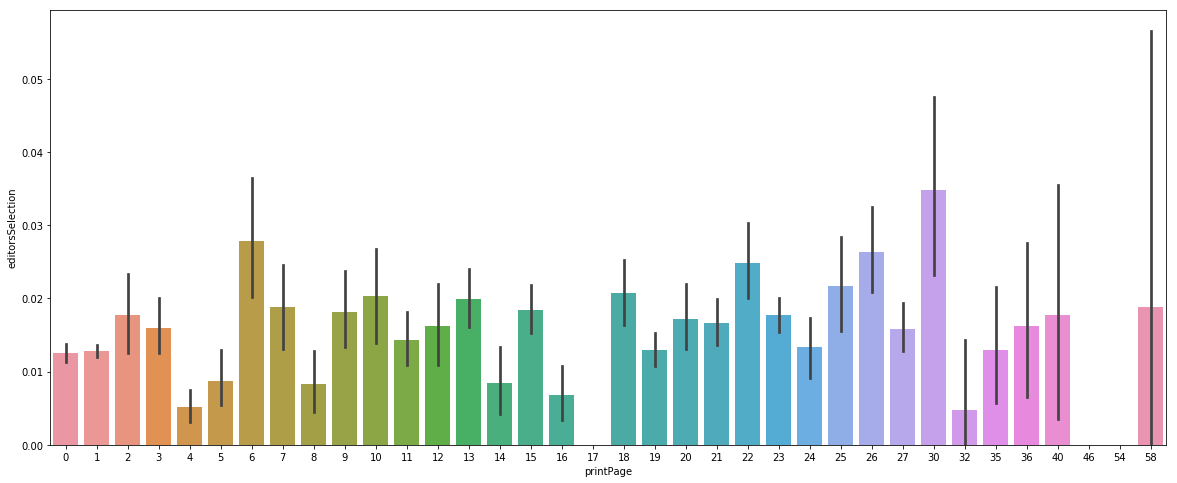

In [65]:
sns.barplot(x='printPage', y='editorsSelection', data=comments);

### Article Desk

Number of comments in each Desk

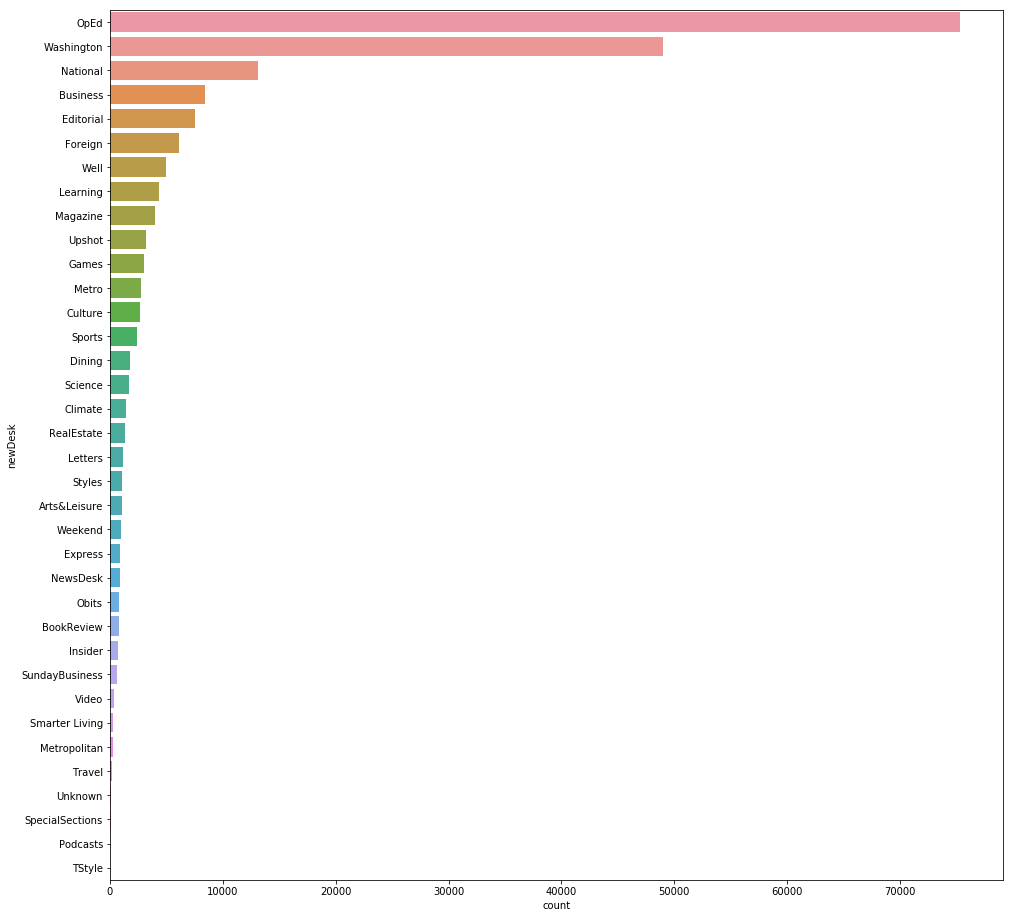

In [66]:
mpl.rcParams['figure.figsize'] = (16, 16)
sns.countplot(y="newDesk", data=comments, order=comments.newDesk.value_counts().index);

Average number of upvotes for the comments in each Desk with the Desks arranged in the same order as above:

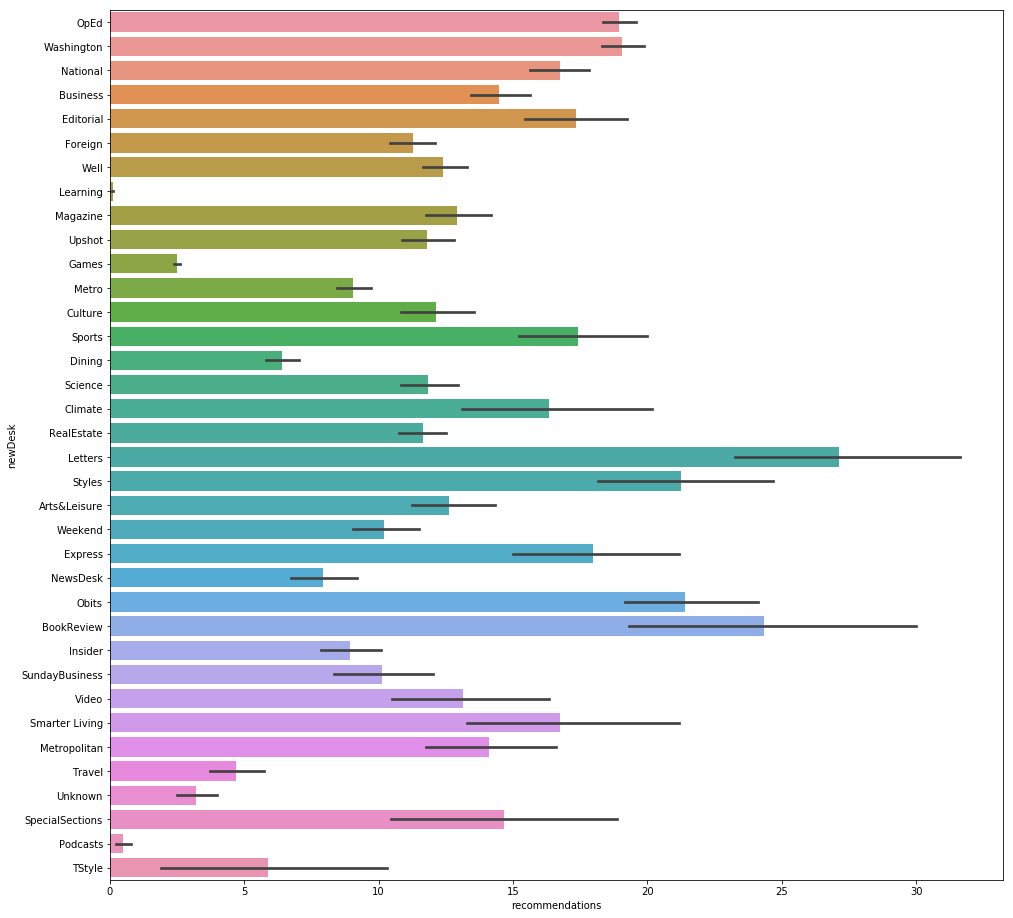

In [67]:
mpl.rcParams['figure.figsize'] = (16, 16)
sns.barplot(y='newDesk', x='recommendations', data=comments, order=comments.newDesk.value_counts().index);

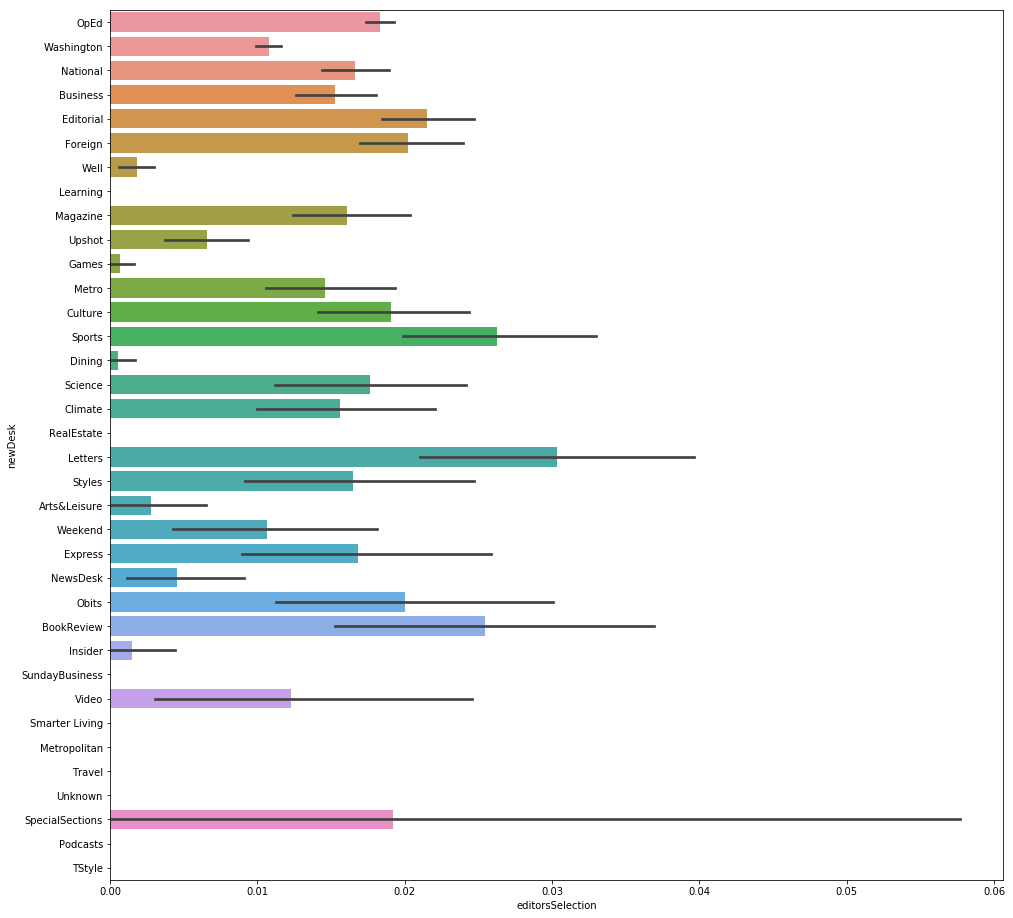

In [68]:
sns.barplot(y='newDesk', x='editorsSelection', data=comments, order=comments.newDesk.value_counts().index);

First we select the top four Desks where most comments are made and then we plot the number of upvotes in a sample of 2000 comments from those Desk:

In [69]:
top_desk = set(comments.newDesk.value_counts()[:4].index)
top_desk

{'Business', 'National', 'OpEd', 'Washington'}

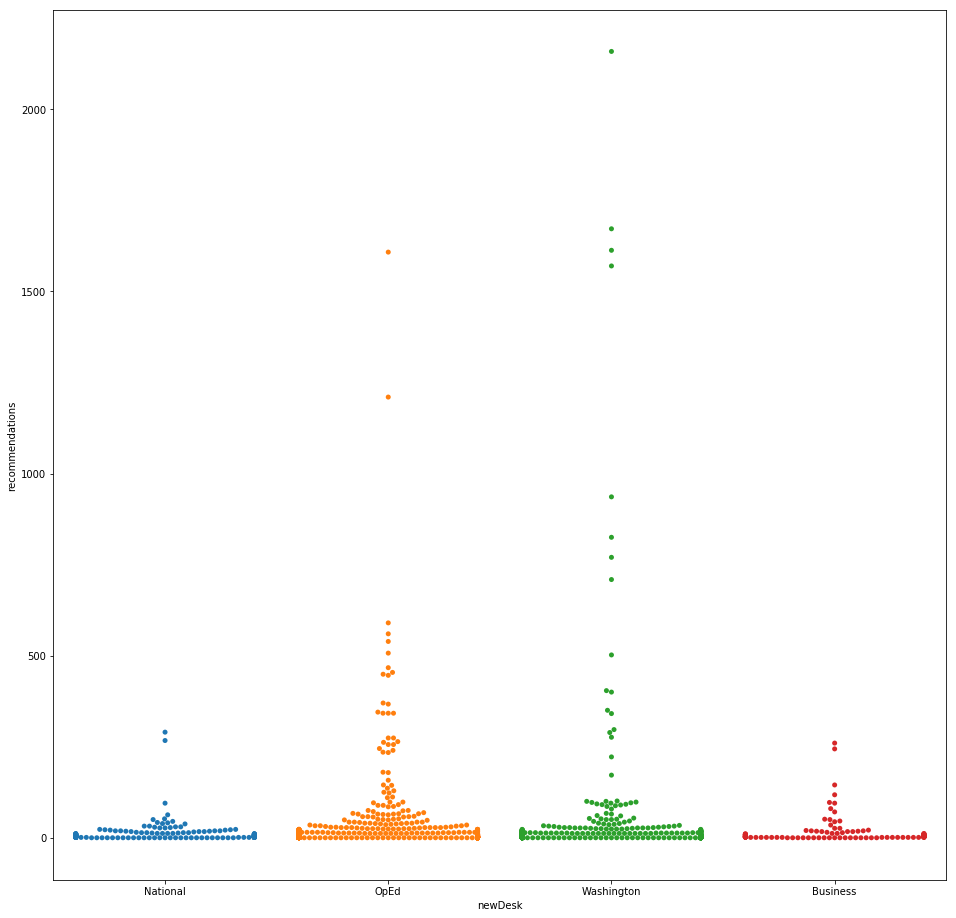

In [70]:
sample_frequent_newDesk = comments.loc[comments.newDesk.isin(top_desk),
                                 ['newDesk', 'recommendations']].sample(2000)

sample_frequent_newDesk.newDesk = sample_frequent_newDesk.newDesk.astype('object')
sns.swarmplot(x='newDesk', y='recommendations', data=sample_frequent_newDesk);

### Section of news articles

Number of comments in each section

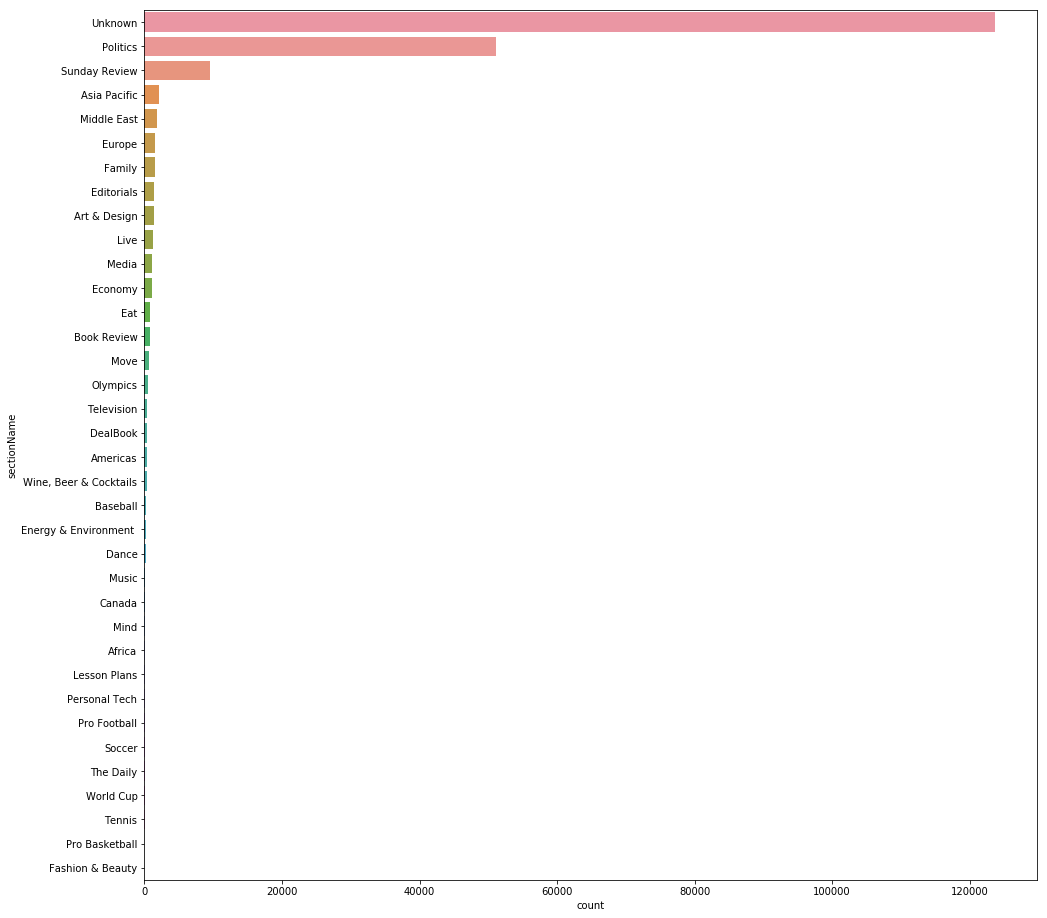

In [71]:
sns.countplot(y="sectionName", data=comments, order=comments.sectionName.value_counts().index)

Average number of upvotes for the comments in each section with the sections arranged in the same order as above:

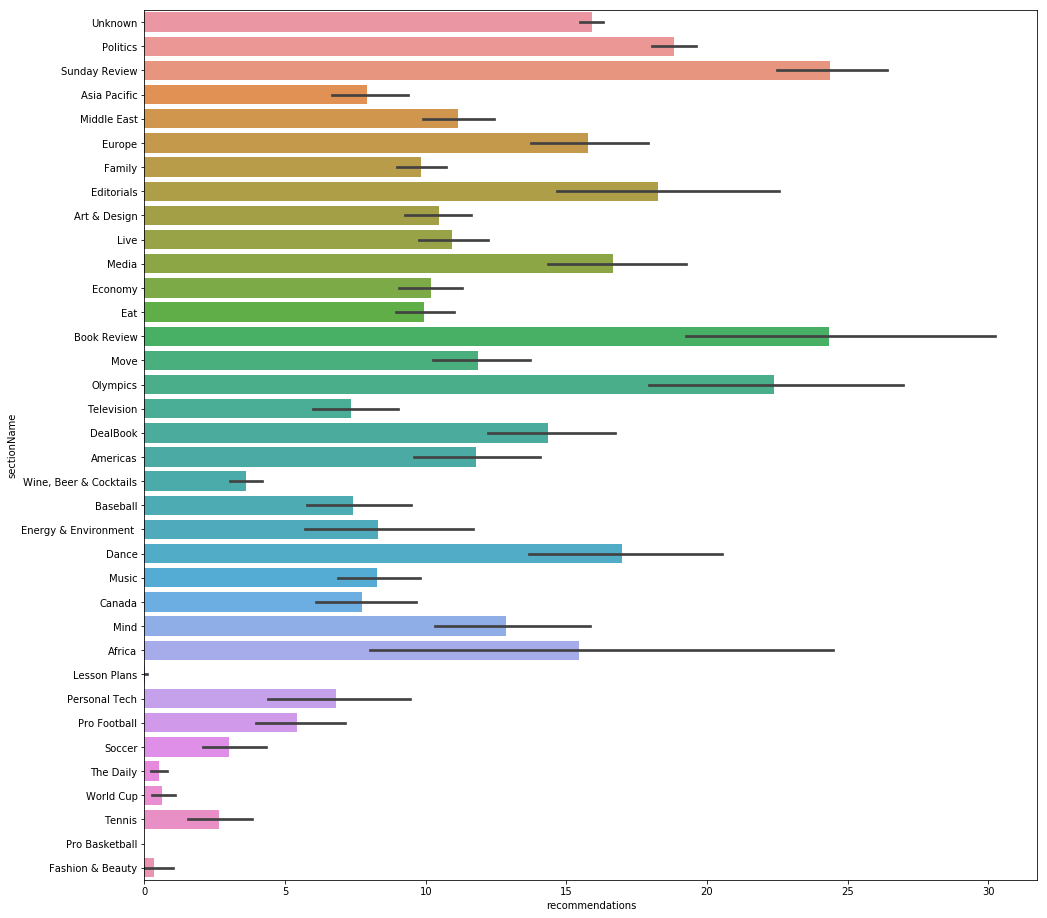

In [72]:
sns.barplot(y='sectionName', x='recommendations', data=comments, order=comments.sectionName.value_counts().index);

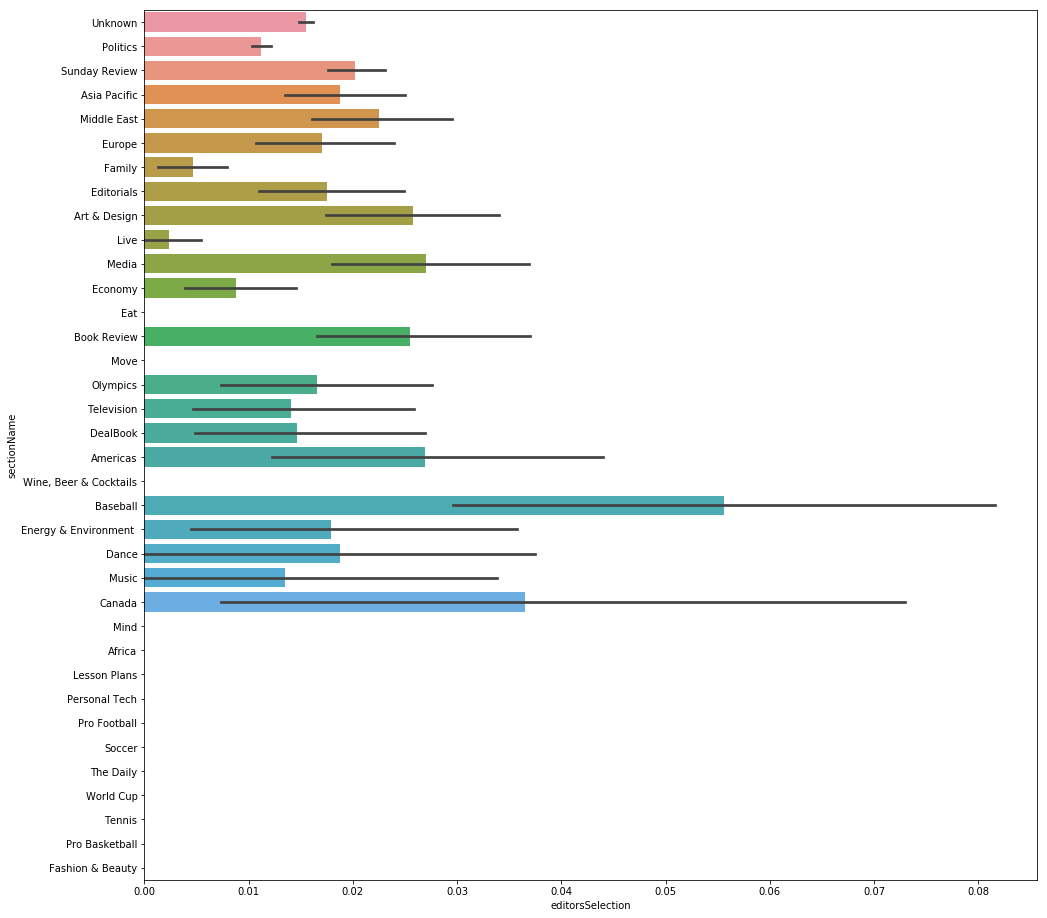

In [73]:
sns.barplot(y='sectionName', x='editorsSelection', data=comments, order=comments.sectionName.value_counts().index);

## Word count of articles

The median number of upvotes on comments based on the word count of articles is plotted below. Some articles are likely to attract more upvotes on most of its comments and hence the median upvotes for comments based on the word counts of the article has spikes.

In [74]:
sorted_articles = articles[['articleWordCount', 'editorsSelection', 'recommendations']].sort_values(by='articleWordCount')

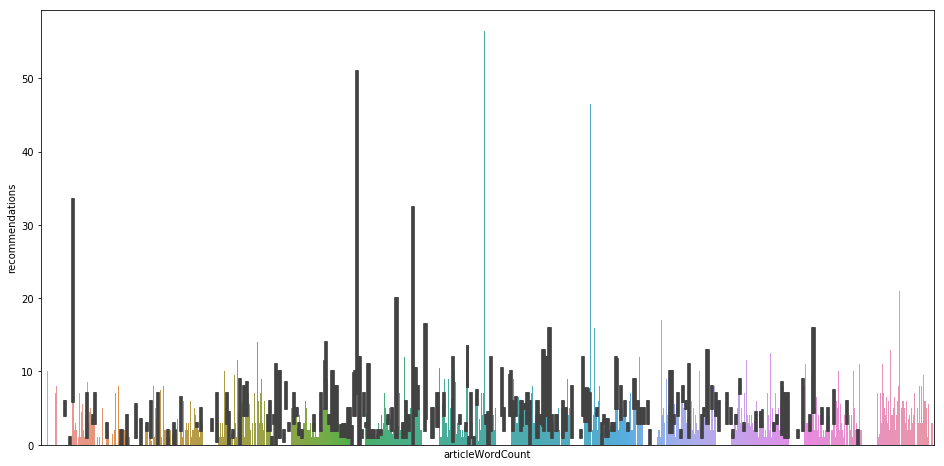

In [75]:
mpl.rcParams['figure.figsize'] = (16, 8)
sns.barplot(x='articleWordCount', y='recommendations', data=sorted_articles, order=sorted_articles.articleWordCount);
plt.xticks([]);

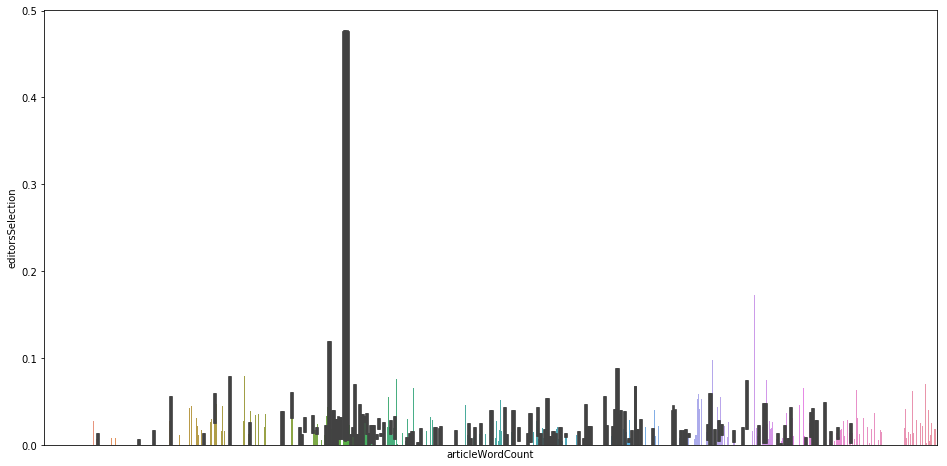

In [76]:
sns.barplot(x='articleWordCount', y='editorsSelection', data=sorted_articles, order=sorted_articles.articleWordCount);
plt.xticks([]);

## Features related to the timeline of the comments

The three features - create date, approve date and update date follow a very similar pattern.

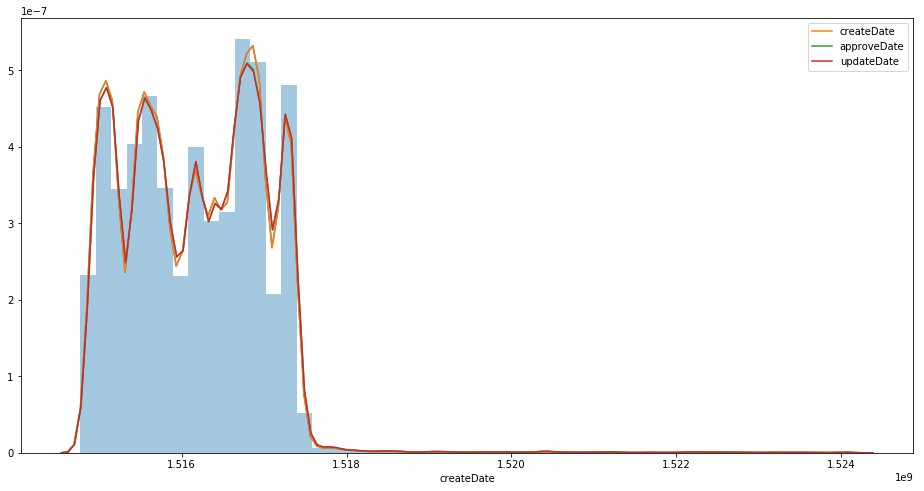

In [77]:
fig, ax = plt.subplots()
sns.distplot(comments.createDate, ax=ax);
sns.kdeplot(comments.createDate, ax=ax);
sns.kdeplot(comments.approveDate, ax=ax);
sns.kdeplot(comments.updateDate, ax=ax);

## Miscellaneous features

### Sharing

In [78]:
comments.sharing.value_counts()

0    186407
1     16770
Name: sharing, dtype: int64

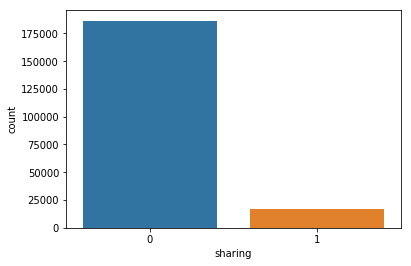

In [79]:
mpl.rcParams['figure.figsize'] = (6, 4)
sns.countplot(x="sharing", data=comments);

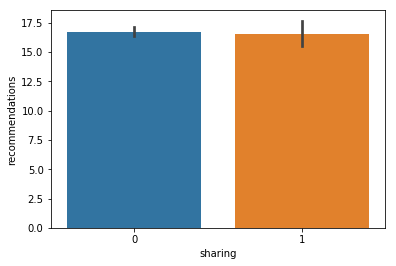

In [80]:
sns.barplot(x='sharing', y='recommendations', data=comments);

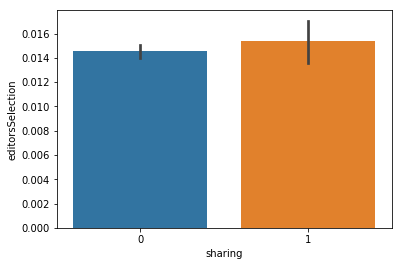

In [81]:
sns.barplot(x='sharing', y='editorsSelection', data=comments);

### Trusted

In [82]:
comments.trusted.value_counts()

0    196135
1      7042
Name: trusted, dtype: int64

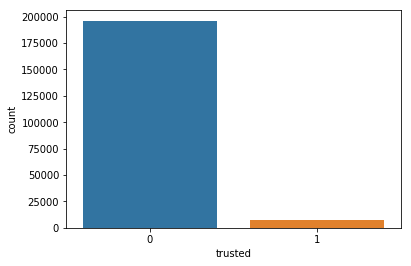

In [83]:
sns.countplot(x="trusted", data=comments);

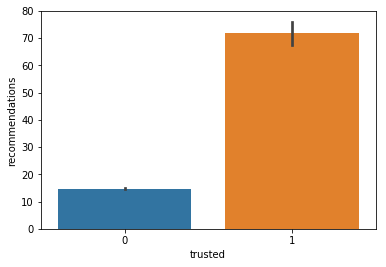

In [84]:
sns.barplot(x='trusted', y='recommendations', data=comments);

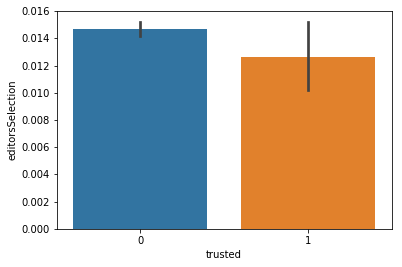

In [85]:
sns.barplot(x='trusted', y='editorsSelection', data=comments);

### Timespeople

In [86]:
comments.timespeople.value_counts()

1    186825
0     16352
Name: timespeople, dtype: int64

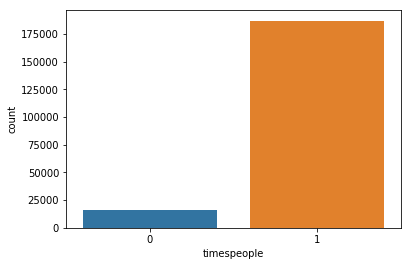

In [87]:
sns.countplot(x="timespeople", data=comments);

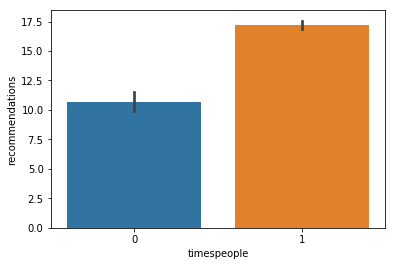

In [88]:
sns.barplot(x='timespeople', y='recommendations', data=comments);

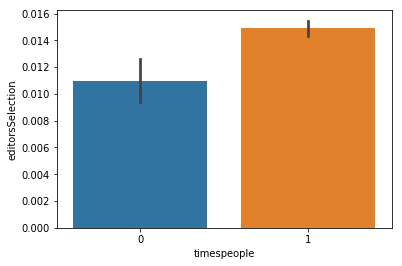

In [89]:
sns.barplot(x='timespeople', y='editorsSelection', data=comments);

### User pic

Most of the commenters have default picture as reflected in the value counts of the picURL below:

In [90]:
comments.picURL.value_counts()[:10]

https://graphics8.nytimes.com/images/apps/timespeople/none.png                                                171595
http://graphics8.nytimes.com/images/apps/timespeople/none.png                                                   3150
https://s3.amazonaws.com/pimage.timespeople.nytimes.com/1122/8992/cropped-11228992.jpg?0.22918879217468202       335
https://s3.amazonaws.com/pimage.timespeople.nytimes.com/4712/3844/cropped-47123844.jpg?0.06419149620228637       271
https://s3.amazonaws.com/pimage.timespeople.nytimes.com/3747/5504/cropped-37475504.jpg                           226
https://s3.amazonaws.com/pimage.timespeople.nytimes.com/4428/7968/cropped-44287968.jpg?0.07104355978353172       202
https://s3.amazonaws.com/pimage.timespeople.nytimes.com/5707/6816/cropped-57076816.jpg?0.8316165613281022        198
https://s3.amazonaws.com/pimage.timespeople.nytimes.com/6893/8663/cropped-68938663.jpg?0.5158820140853206        189
https://s3.amazonaws.com/pimage.timespeople.nytimes.com/6532/627

We derive a feature that is 1 if the commenter has customized pic else 0 for the default pic.

In [91]:
def custom_pic_feature(df):
    url1 = 'https://graphics8.nytimes.com/images/apps/timespeople/none.png'
    url2 = 'http://graphics8.nytimes.com/images/apps/timespeople/none.png'
    df['customPic'] = np.where((df.picURL == url1) | (df.picURL == url2), 0, 1)
    df.customPic = df.customPic.astype('category').cat.codes
    return df

comments = custom_pic_feature(comments)

We check the value count for customized pic in the comments and then plot the graph below:

In [92]:
comments.customPic.value_counts()

0    174745
1     28432
Name: customPic, dtype: int64

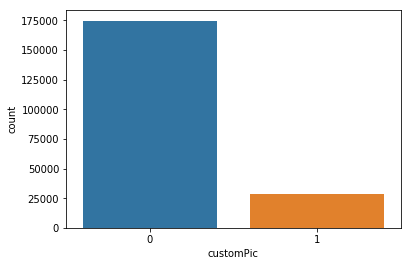

In [93]:
mpl.rcParams['figure.figsize'] = (6, 4)
sns.countplot(x="customPic", data=comments);

Next we check the average number of upvotes on comment having customized and default pics and see that the average is slightly higher for the former.

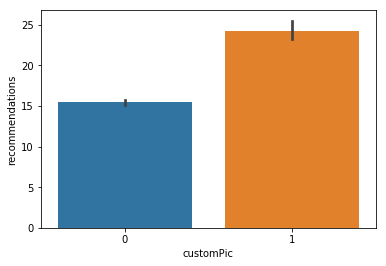

In [94]:
sns.barplot(x='customPic', y='recommendations', data=comments);

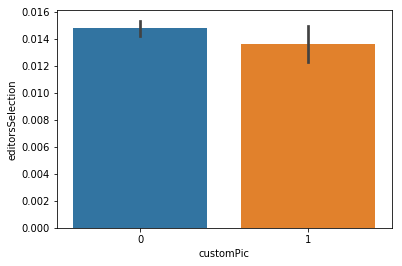

In [95]:
sns.barplot(x='customPic', y='editorsSelection', data=comments);

### Interplay between the features - customPic and timespeople:

Most of the comments with timespeople value equal to 0 have default pic whereas for most comments with custom pic, the timespeople value is 1.

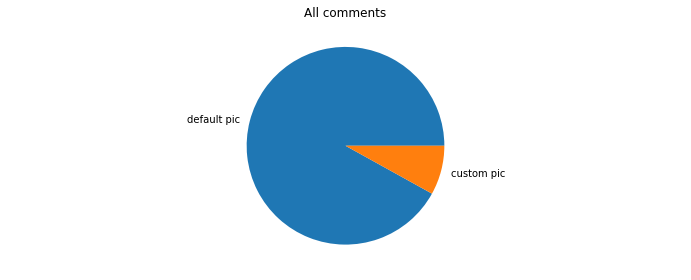

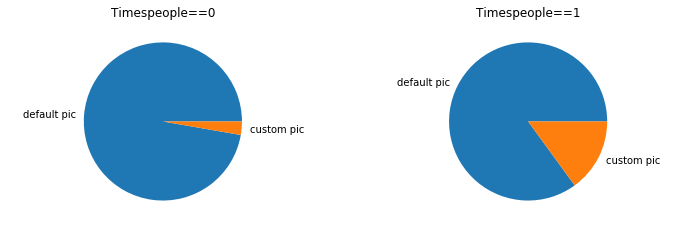

In [96]:
plt.figure(figsize=(12, 10))
ax = plt.subplot(211)
ax.axis('equal')
ax.pie(comments.timespeople.value_counts(), labels=('default pic', 'custom pic'));
ax.set_title('All comments')

plt.figure(figsize=(12, 8))
ax1 = plt.subplot(223)
ax1.axis('equal')
ax1.pie(comments.loc[comments.timespeople==0, 'customPic'].value_counts(), labels=('default pic', 'custom pic'));
ax1.set_title('Timespeople==0')

ax2 = plt.subplot(224)
ax2.axis('equal')
ax2.pie(comments.loc[comments.timespeople==1, 'customPic'].value_counts(), labels=('default pic', 'custom pic'));
ax2.set_title('Timespeople==1')

plt.show()

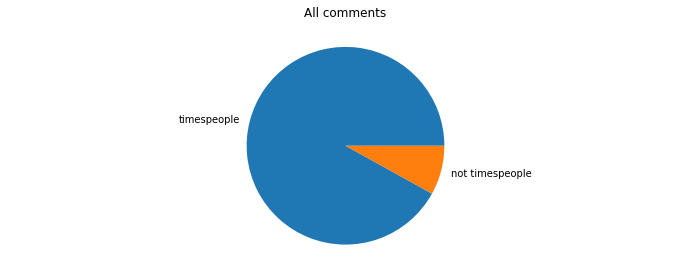

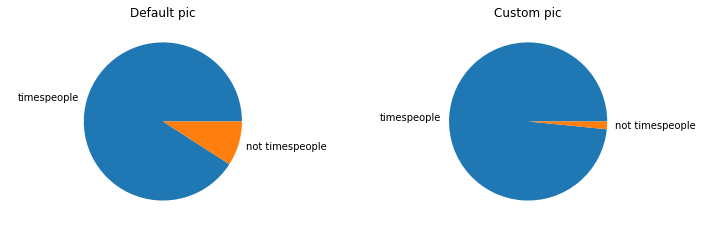

In [97]:
plt.figure(figsize=(12, 10))
ax = plt.subplot(211)
ax.axis('equal')
ax.pie(comments.timespeople.value_counts(), labels=('timespeople', 'not timespeople'));
ax.set_title('All comments')

plt.figure(figsize=(12, 8))
ax1 = plt.subplot(223)
ax1.axis('equal')
ax1.pie(comments.loc[comments.customPic==0, 'timespeople'].value_counts(), labels=('timespeople', 'not timespeople'));
ax1.set_title('Default pic')

ax2 = plt.subplot(224)
ax2.axis('equal')
ax2.pie(comments.loc[comments.customPic==1, 'timespeople'].value_counts(), labels=('timespeople', 'not timespeople'));
ax2.set_title('Custom pic')

plt.show()

The pie charts above shows comments with custom pic are more likely to have the value of timespeoples equal to 1 and vice versa. The graphs below shows the relationship of these two features with the average number of upvotes received.

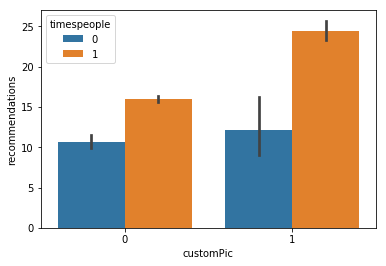

In [98]:
sns.barplot(x='customPic', y='recommendations', hue='timespeople', data=comments);

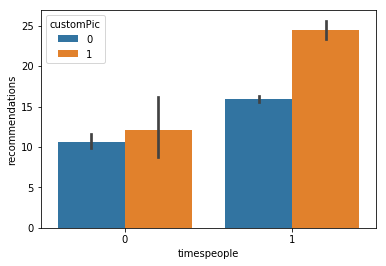

In [99]:
sns.barplot(x='timespeople', y='recommendations', hue='customPic', data=comments);

### User title

In [100]:
comments.userTitle.value_counts()

Unknown                           203162
Reporter, New York Times               5
NYT Video                              3
New Old Age columnist                  3
Columnist, New York Today              2
The Learning Network                   1
Metro reporter, New York Times         1
Name: userTitle, dtype: int64

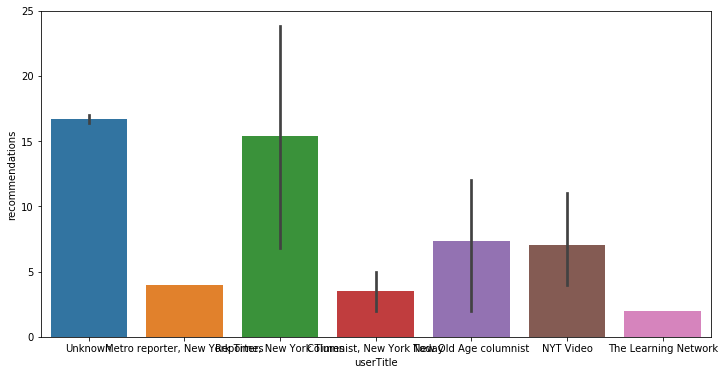

In [101]:
mpl.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="userTitle", y='recommendations', data=comments);

# Conclusion

We have explored the numerical and categorical features so far using graphs and descriptive statistics. The most central features in the dataset are textual for example the commentBody. The next kernel that is a work in progress will be a starter kernel for model building using the textual data. 